In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smf
import statsmodels.formula.api as sm
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('wage.csv')

In [3]:
df.describe()

,id,nearc2,nearc4,educ,age,fatheduc,motheduc,weight,momdad14,sinmom14,...,smsa66,wage,enroll,KWW,IQ,married,libcrd14,exper,lwage,expersq
count,3010.000000,3010.000000,3010.000000,3010.000000,3010.000000,2320.000000,2657.000000,3.010000e+03,3010.000000,3010.000000,...,3010.000000,3010.000000,3010.000000,2963.000000,2061.000000,3003.000000,2997.000000,3010.000000,3010.000000,3010.000000
mean,2581.748837,0.440864,0.682060,13.263455,28.119601,10.003448,10.348137,3.211853e+05,0.789369,0.100664,...,0.649502,577.282392,0.092359,33.540668,102.449782,2.271395,0.674341,8.856146,6.261832,95.579070
std,1500.538849,0.496573,0.465753,2.676913,3.137004,3.720737,3.179671,1.706458e+05,0.407825,0.300934,...,0.477205,262.958302,0.289580,8.611619,15.423756,2.066823,0.468699,4.141672,0.443798,84.618314
min,2.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,7.560700e+04,0.000000,0.000000,...,0.000000,100.000000,0.000000,4.000000,50.000000,1.000000,0.000000,0.000000,4.605170,0.000000
25%,1275.500000,0.000000,0.000000,12.000000,25.000000,8.000000,8.000000,1.227980e+05,1.000000,0.000000,...,0.000000,394.250000,0.000000,28.000000,93.000000,1.000000,0.000000,6.000000,5.976985,36.000000
50%,2541.000000,0.000000,1.000000,13.000000,28.000000,10.000000,12.000000,3.652000e+05,1.000000,0.000000,...,1.000000,537.500000,0.000000,34.000000,103.000000,1.000000,1.000000,8.000000,6.286928,64.000000
75%,3858.750000,1.000000,1.000000,16.000000,31.000000,12.000000,12.000000,4.060240e+05,1.000000,0.000000,...,1.000000,708.750000,0.000000,40.000000,113.000000,4.000000,1.000000,11.000000,6.563503,121.000000
max,5225.000000,1.000000,1.000000,18.000000,34.000000,18.000000,18.000000,1.752340e+06,1.000000,1.000000,...,1.000000,2404.000000,1.000000,56.000000,149.000000,6.000000,1.000000,23.000000,7.784889,529.000000


In [4]:

df.head()

,id,nearc2,nearc4,educ,age,fatheduc,motheduc,weight,momdad14,sinmom14,...,smsa66,wage,enroll,KWW,IQ,married,libcrd14,exper,lwage,expersq
0,2,0,0,7,29,NaN,NaN,158413,1,0,...,1,548,0,15.0,NaN,1.0,0.0,16,6.306275,256
1,3,0,0,12,27,8.0,8.0,380166,1,0,...,1,481,0,35.0,93.0,1.0,1.0,9,6.175867,81
2,4,0,0,12,34,14.0,12.0,367470,1,0,...,1,721,0,42.0,103.0,1.0,1.0,16,6.580639,256
3,5,1,1,11,27,11.0,12.0,380166,1,0,...,1,250,0,25.0,88.0,1.0,1.0,10,5.521461,100
4,6,1,1,12,34,8.0,7.0,367470,1,0,...,1,729,0,34.0,108.0,1.0,0.0,16,6.591674,256


In [5]:
df.tail()

,id,nearc2,nearc4,educ,age,fatheduc,motheduc,weight,momdad14,sinmom14,...,smsa66,wage,enroll,KWW,IQ,married,libcrd14,exper,lwage,expersq
3005,5218,0,1,12,25,8.0,12.0,82135,1,0,...,0,335,0,15.0,NaN,1.0,0.0,7,5.814130,49
3006,5219,0,1,13,34,NaN,NaN,88765,1,0,...,0,481,0,43.0,NaN,1.0,1.0,15,6.175867,225
3007,5220,0,1,12,24,11.0,NaN,89271,0,0,...,0,500,0,25.0,109.0,1.0,0.0,6,6.214608,36
3008,5221,0,1,12,31,NaN,NaN,110376,1,0,...,0,713,0,32.0,107.0,1.0,1.0,13,6.569481,169
3009,5225,0,1,13,26,NaN,NaN,81081,0,0,...,0,525,1,27.0,NaN,1.0,0.0,7,6.263398,49


In [6]:
df.isna().sum()

id            0
nearc2        0
nearc4        0
educ          0
age           0
fatheduc    690
motheduc    353
weight        0
momdad14      0
sinmom14      0
step14        0
reg661        0
reg662        0
reg663        0
reg664        0
reg665        0
reg666        0
reg667        0
reg668        0
reg669        0
south66       0
black         0
smsa          0
south         0
smsa66        0
wage          0
enroll        0
KWW          47
IQ          949
married       7
libcrd14     13
exper         0
lwage         0
expersq       0
dtype: int64

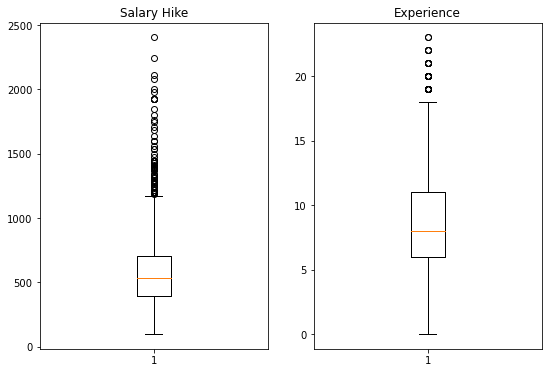

In [7]:
plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.boxplot(df['wage'])
plt.title('Salary Hike')
plt.subplot(122)
plt.boxplot(df['exper'])
plt.title('Experience')
plt.show()

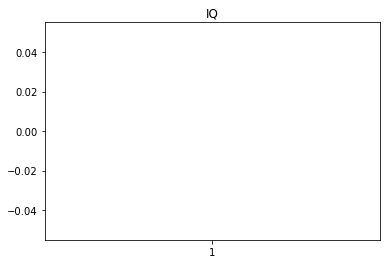

In [8]:
plt.boxplot(df['IQ'])
plt.title('IQ')
plt.show()

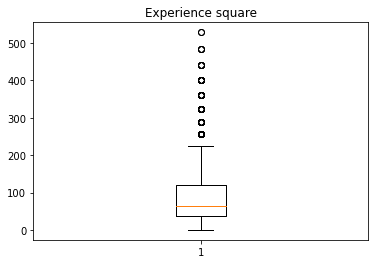

In [9]:
plt.boxplot(df['expersq'])
plt.title('Experience square')
plt.show()

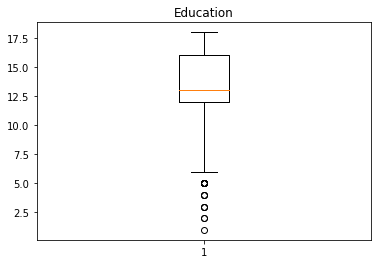

In [10]:
plt.boxplot(df['educ'])
plt.title('Education')
plt.show()

In [11]:
indexDrop = df[(df['exper'] == 0)].index
df = df.drop(indexDrop)
indexDrop = df[(df['IQ'] == 0)].index
df = df.drop(indexDrop)
indexDrop = df[(df['black'] == 1)].index
df['black'].replace(to_replace= indexDrop, value = 2, inplace=True )
indexDrop = df[(df['black'] == 0)].index
df['black'].replace(to_replace= indexDrop, value = 1, inplace=True )
df = df.dropna(axis=0)

In [12]:
model = sm.ols('wage~educ+exper+expersq+KWW+IQ+married', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     66.58
Date:                Thu, 03 Nov 2022   Prob (F-statistic):           5.42e-74
Time:                        15:11:40   Log-Likelihood:                -10997.
No. Observations:                1596   AIC:                         2.201e+04
Df Residuals:                    1589   BIC:                         2.205e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -543.6997     75.915     -7.162      0.000    -692.603    -394.796
educ          43.0053      3.952     10.883      0.000      35.254      50.756
exper         56.6741      7.455      7.602      0.000      42.052      71.296
expersq       -1.7594      0.384     -4.576      0.000      -2.513      -1.005
KWW            3.4374      1.034      3.324      0.001       1.409       5.466
IQ             1.4092      0.493      2.859      0.004       0.442       2.376
married      -15.3030      3.060     -5.000      0.000     -21.306      -9.300
==============================================================================
Omnibus:                      477.319   Durbin-Watson:                   1.796
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2084.576
Skew:                           1.366   Prob(JB):                         0.00
Kurtosis:                       7.887   Cond. No.                     1.80e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
model1 = sm.ols('np.sqrt(wage)~np.sqrt(educ)+np.sqrt(exper)+np.sqrt(expersq)+np.sqrt(KWW)+np.sqrt(IQ)+np.sqrt(married)', data = df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.sqrt(wage)   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     67.66
Date:                Thu, 03 Nov 2022   Prob (F-statistic):           4.14e-75
Time:                        15:11:40   Log-Likelihood:                -4676.4
No. Observations:                1596   AIC:                             9367.
Df Residuals:                    1589   BIC:                             9405.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -17.8038      2.936     -6.064      0.000     -23.562     -12.045
np.sqrt(educ)        6.0345      0.565     10.674      0.000       4.926       7.143
np.sqrt(exper)       4.6862      1.138      4.117      0.000       2.454       6.919
np.sqrt(expersq)    -0.3483      0.205     -1.701      0.089      -0.750       0.053
np.sqrt(KWW)         0.7186      0.228      3.148      0.002       0.271       1.166
np.sqrt(IQ)          0.6559      0.187      3.508      0.000       0.289       1.023
np.sqrt(married)    -1.1180      0.197     -5.664      0.000      -1.505      -0.731
==============================================================================
Omnibus:                       95.066   Durbin-Watson:                   1.800
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.889
Skew:                           0.461   Prob(JB):                     5.19e-35
Kurtosis:                       4.234   Cond. No.                         408.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
model2 = sm.ols('np.cbrt(wage)~np.cbrt(educ)+np.cbrt(exper)+np.cbrt(expersq)+np.cbrt(KWW)+np.cbrt(IQ)+np.cbrt(married)', data = df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.cbrt(wage)   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     67.00
Date:                Thu, 03 Nov 2022   Prob (F-statistic):           1.96e-74
Time:                        15:11:40   Log-Likelihood:                -2321.2
No. Observations:                1596   AIC:                             4656.
Df Residuals:                    1589   BIC:                             4694.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -5.3736      1.071     -5.017      0.000      -7.475      -3.273
np.cbrt(educ)        3.1622      0.301     10.521      0.000       2.573       3.752
np.cbrt(exper)       1.6442      0.730      2.254      0.024       0.213       3.075
np.cbrt(expersq)    -0.0870      0.192     -0.454      0.650      -0.463       0.289
np.cbrt(KWW)         0.4265      0.140      3.048      0.002       0.152       0.701
np.cbrt(IQ)          0.5126      0.138      3.725      0.000       0.243       0.783
np.cbrt(married)    -0.4658      0.080     -5.858      0.000      -0.622      -0.310
==============================================================================
Omnibus:                       34.295   Durbin-Watson:                   1.805
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.121
Skew:                           0.208   Prob(JB):                     4.81e-12
Kurtosis:                       3.782   Cond. No.                         365.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
model3 = sm.ols('np.log(wage)~np.log(educ)+np.log(exper)+np.log(expersq)+np.log(KWW)+np.log(IQ)+np.log(married)', data = df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           np.log(wage)   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     76.60
Date:                Thu, 03 Nov 2022   Prob (F-statistic):           4.43e-72
Time:                        15:11:40   Log-Likelihood:                -703.85
No. Observations:                1596   AIC:                             1420.
Df Residuals:                    1590   BIC:                             1452.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.5887      0.342      4.649      0.000       0.918       2.259
np.log(educ)        0.8521      0.086      9.938      0.000       0.684       1.020
np.log(exper)       0.0547      0.005     10.845      0.000       0.045       0.065
np.log(expersq)     0.1094      0.010     10.845      0.000       0.090       0.129
np.log(KWW)         0.1652      0.053      3.112      0.002       0.061       0.269
np.log(IQ)          0.3065      0.076      4.023      0.000       0.157       0.456
np.log(married)    -0.0801      0.013     -6.163      0.000      -0.106      -0.055
==============================================================================
Omnibus:                       35.541   Durbin-Watson:                   1.818
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.188
Skew:                          -0.267   Prob(JB):                     9.34e-11
Kurtosis:                       3.639   Cond. No.                     5.07e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.85e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [16]:
model.params

Intercept   -543.699715
educ          43.005299
exper         56.674140
expersq       -1.759360
KWW            3.437421
IQ             1.409249
married      -15.302956
dtype: float64

In [17]:
print(model.tvalues,'\n',model.pvalues)

Intercept    -7.161971
educ         10.883111
exper         7.602405
expersq      -4.575985
KWW           3.324092
IQ            2.859102
married      -5.000358
dtype: float64 
 Intercept    1.211556e-12
educ         1.178123e-26
exper        4.942735e-14
expersq      5.108070e-06
KWW          9.072515e-04
IQ           4.303868e-03
married      6.356112e-07
dtype: float64


In [18]:
model.rsquared,model.rsquared_adj

(0.2008860822029439, 0.19786866023517657)

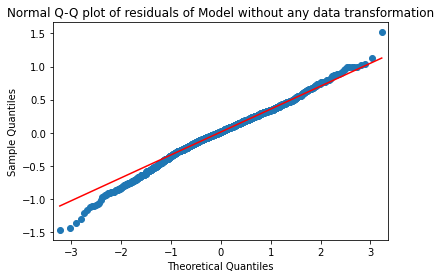

In [19]:
import statsmodels.api as sm
sm.qqplot(model3.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model without any data transformation')
plt.show()

Normal Q-Q residual plot to display a Q-Q plot assessing data skew and model fit. This chart displays the standardized residuals on the y-axis and the theoretical quantiles on the x-axis.

In [20]:
x = pd.read_csv('wage.csv')
indexDrop = x[(x['exper'] == 0)].index
x = x.drop(indexDrop)
indexDrop = x[(x['black'] == 1)].index
x['black'].replace(to_replace= indexDrop, value = 2, inplace=True )
indexDrop = x[(x['black'] == 0)].index
x['black'].replace(to_replace= indexDrop, value = 1, inplace=True )
x = x.dropna()

In [21]:
from sklearn.metrics import mean_squared_error

In [22]:
model1_pred_y =np.square(model1.predict(x[:100]))
model2_pred_y =pow(model2.predict(x[:100]),3)
model3_pred_y =np.exp(model3.predict(x[:100]))

In [23]:
model1_rmse =np.sqrt(mean_squared_error(x['wage'][:100], model1_pred_y))
model2_rmse =np.sqrt(mean_squared_error(x['wage'][:100], model2_pred_y))
model3_rmse =np.sqrt(mean_squared_error(x['wage'][:100], model3_pred_y))
print('model=', np.sqrt(model.mse_resid),'\n' 'model1=', model1_rmse,'\n' 'model2=', model2_rmse,'\n' 'model3=', model3_rmse)

model= 238.38810098009844 
model1= 218.01653719071624 
model2= 219.43788465535778 
model3= 223.73744972608768


In [24]:
rmse = {'model': np.sqrt(model.mse_resid), 'model1': model1_rmse, 'model2': model3_rmse, 'model3' : model3_rmse}
min(rmse, key=rmse.get)

'model1'

In [25]:
predicted2 = pd.DataFrame()
predicted2['education'] = x['educ'][:100]
predicted2['expersq'] = x['expersq'][:100]
predicted2['married'] = x['married'][:100]
predicted2['KWW'] = x['married'][:100]
predicted2['IQ'] = x['IQ'][:100]
predicted2['Salary'] = x['wage'][:100]
predicted2['Predicted_wage'] = pd.DataFrame(np.square(model1.predict(x)))
predicted2

,education,expersq,married,KWW,IQ,Salary,Predicted_wage
1,12,81,1.0,1.0,93.0,481,551.448782
2,12,256,1.0,1.0,103.0,721,700.570455
3,11,100,1.0,1.0,88.0,250,491.710261
4,12,256,1.0,1.0,108.0,729,684.400272
5,12,64,1.0,1.0,85.0,500,525.668715
...,...,...,...,...,...,...,...
141,14,64,1.0,1.0,103.0,635,641.458207
143,13,225,1.0,1.0,109.0,615,758.202062
144,16,16,6.0,6.0,130.0,462,540.262352
145,12,256,1.0,1.0,105.0,865,712.679307


In [26]:
predicted2.to_excel("output.xlsx")  